In [1]:
cd ..

/Users/Amar/Dropbox/Computer_Science/GATECH-OMSCS/7641_ML/gatech-p3


In [2]:
%run __init__.py
%run src/load_data.py
sns.set()

In [3]:
adult_train_f = data['adult']['train']['engineered']
adult_test_f = data['adult']['test']['engineered']
adult_train_labels = data['adult']['train']['labels']
adult_test_labels = data['adult']['test']['labels']

madelon_train_labels = data['madelon']['train']['labels']
madelon_test_labels = data['madelon']['test']['labels']
madelon_train_f = data['madelon']['train']['raw_data']
madelon_test_f = data['madelon']['test']['raw_data']

In [4]:
madelon_train_labels.replace(-1,0, inplace = True)
madelon_test_labels.replace(-1,0, inplace= True)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
adult_train_f = scaler.fit_transform(adult_train_f)
adult_test_f = scaler.transform(adult_test_f)

scaler = StandardScaler()
madelon_train_f = scaler.fit_transform(madelon_train_f)
madelon_test_f = scaler.transform(madelon_test_f)


In [7]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import normalized_mutual_info_score, silhouette_score

In [8]:
def get_scores(data, true_labels, estimator):
    sil_results = [np.nan, np.nan]
    nmi_results = [np.nan, np.nan]
    for i in range(2,32):
        cluster = estimator(i, verbose = 0)
        cluster.fit(data)
        labels = cluster.predict(data)
        sil_score = silhouette_score(data, labels, sample_size = 5000)
        norm_score = normalized_mutual_info_score(true_labels, labels)
        sil_results.append(sil_score)
        nmi_results.append(norm_score)
    
    return (sil_results, nmi_results)

In [9]:
def plot_sil_nmi(sil, nmi, algo, dataset):
    plt.figure(figsize = (16,4))
    ax1 = plt.subplot(121)
    ax1.plot(sil)
    ax1.set_title("{} {} Silhouette Score".format(algo, dataset))
    ax1.set_xlabel("{}-Clusters".format(algo))
    ax1.set_ylabel("Silhouette Score")

    ax2 = plt.subplot(122)
    ax2.plot(nmi)
    ax2.set_title("{} {} Normalized Mutual Information".format(algo, dataset))
    ax2.set_xlabel("{}-Clusters".format(algo))
    ax2.set_ylabel("NMI Score")
    


In [24]:
def plot_cluster_hist(data, model, sil_results, nmi_results, algo, dataset):
    k1 = np.nanargmax(sil_results)
    k2 = np.nanargmax(nmi_results)
    
    plt.figure(figsize = (16,4))
    ax1 = plt.subplot(121)
    
    clusterer = model(k1)
    clusterer.fit(data)
    labels = clusterer.predict(data)
    ax1.hist(labels, bins = k1)
    ax1.set_xticks(range(k1))
    ax1.set_title("Histogram of optimal # Clusters by Silhouette Score : {}, {}".format(algo, dataset))    
    
    ax2 = plt.subplot(122)
    clusterer = model(k2)
    clusterer.fit(data)
    labels = clusterer.predict(data)
    ax2.hist(labels, bins = k2)
    ax2.set_xticks(range(k2))
    ax2.set_title("Histogram of optimal # Clusters by NMI Score : {}, {}".format(algo, dataset))

In [12]:
k_sil_adult, k_nmi_adult = get_scores(adult_train_f, adult_train_labels, KMeans)

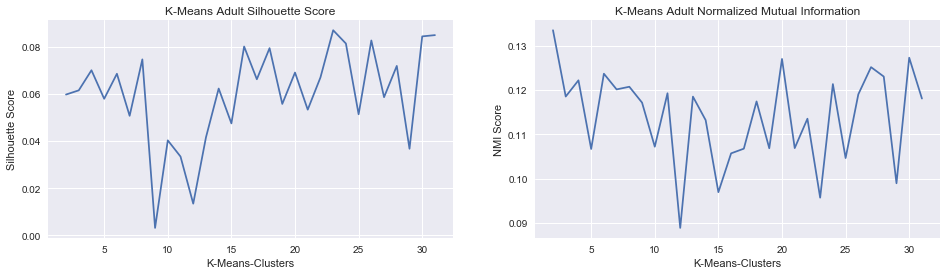

In [14]:
plot_sil_nmi(k_sil_adult, k_nmi_adult, "K-Means", "Adult")

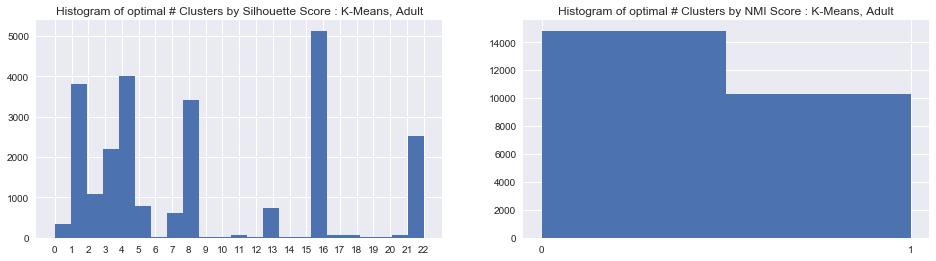

In [25]:
plot_cluster_hist(adult_train_f, KMeans, k_sil_adult, k_nmi_adult, "K-Means", "Adult")

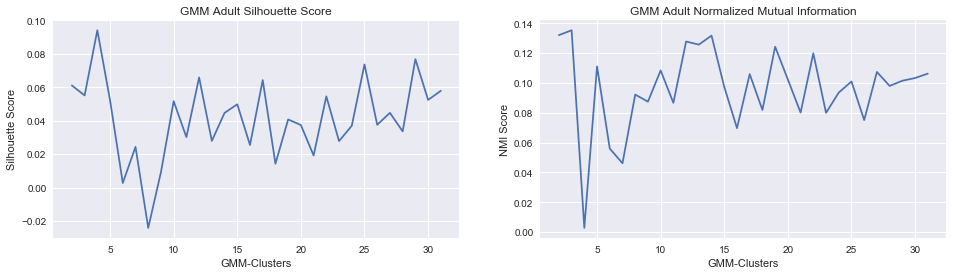

In [27]:
gmm_sil_adult, gmm_nmi_adult = get_scores(adult_train_f, adult_train_labels, GaussianMixture)
plot_sil_nmi(gmm_sil_adult, gmm_nmi_adult, "GMM", "Adult")

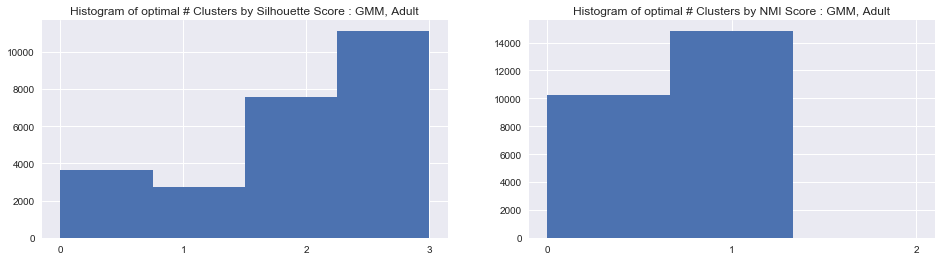

In [28]:
plot_cluster_hist(adult_train_f, GaussianMixture,gmm_sil_adult , gmm_nmi_adult, "GMM", "Adult")

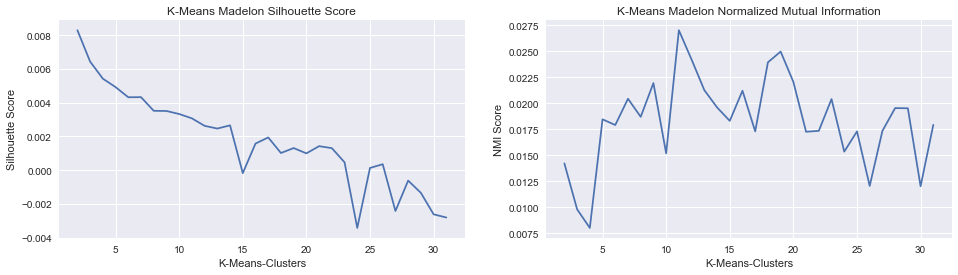

In [30]:
k_sil_madelon, k_nmi_madelon = get_scores(madelon_train_f, madelon_train_labels, KMeans)
plot_sil_nmi(k_sil_madelon, k_nmi_madelon, "K-Means", "Madelon")

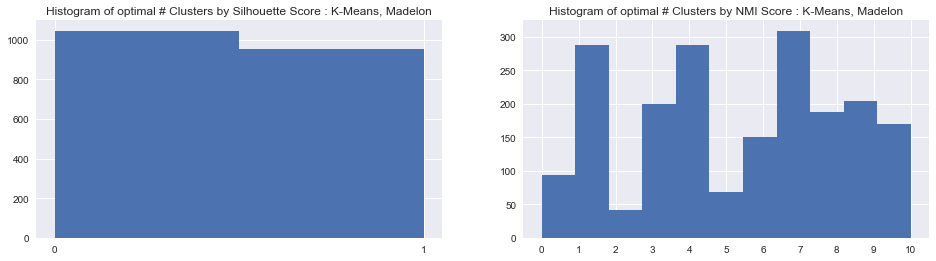

In [31]:
plot_cluster_hist(madelon_train_f, KMeans, k_sil_madelon, k_nmi_madelon, "K-Means", "Madelon")

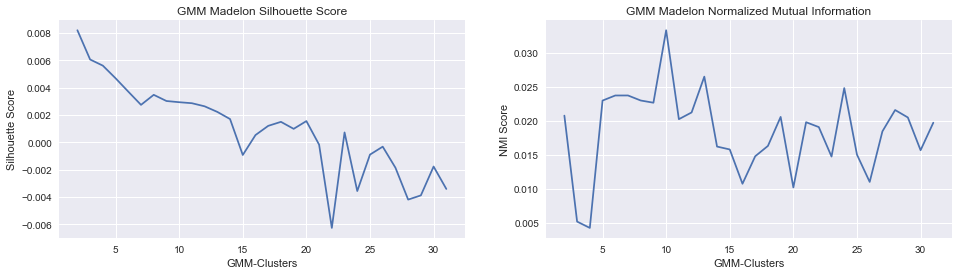

In [33]:
gmm_sil_madelon, gmm_nmi_madelon = get_scores(madelon_train_f, madelon_train_labels, GaussianMixture)
plot_sil_nmi(gmm_sil_madelon, gmm_nmi_madelon, "GMM", "Madelon")

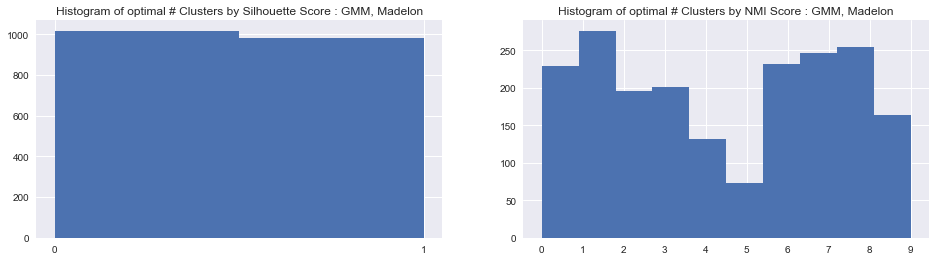

In [34]:
plot_cluster_hist(madelon_train_f, GaussianMixture, gmm_sil_madelon, gmm_nmi_madelon, "GMM", "Madelon")

In [35]:
results = pd.DataFrame()
results['gmm_nmi_adult'] = gmm_nmi_adult
results['gmm_nmi_madelon'] = gmm_nmi_madelon
results['gmm_sil_adult'] = gmm_sil_adult
results['gmm_sil_madelon'] = gmm_sil_madelon
results['k_nmi_adult'] = k_nmi_adult
results['k_nmi_madelon'] = k_nmi_madelon
results['k_sil_adult'] = k_sil_adult
results['k_sil_madelon'] = k_sil_madelon

In [36]:
results.to_csv("results/clustering.csv")

In [37]:
results

,gmm_nmi_adult,gmm_nmi_madelon,gmm_sil_adult,gmm_sil_madelon,k_nmi_adult,k_nmi_madelon,k_sil_adult,k_sil_madelon
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.131964,0.020755,0.061057,0.008210,0.133503,0.014234,0.059767,0.008295
3,0.135255,0.005140,0.055078,0.006070,0.118548,0.009826,0.061543,0.006437
4,0.002756,0.004207,0.094078,0.005621,0.122204,0.008035,0.070080,0.005425
5,0.111025,0.022973,0.052172,0.004698,0.106716,0.018466,0.057967,0.004926
6,0.055936,0.023722,0.002714,0.003720,0.123695,0.017921,0.068594,0.004324
7,0.046082,0.023726,0.024345,0.002752,0.120158,0.020444,0.050733,0.004330
8,0.092131,0.022984,-0.024142,0.003486,0.120755,0.018708,0.074700,0.003520
9,0.087380,0.022657,0.009211,0.003034,0.117174,0.021952,0.003118,0.003510


## F1-scores Scores For 2 clusters (to compare with A1)

In [38]:
from sklearn.metrics import f1_score

In [39]:
def get_f1_score(data, y_true, model):
    clusterer = model(2)
    clusterer.fit(data)
    y_pred = clusterer.predict(data)
    score = f1_score(y_true, y_pred)
    print (score)
    return score

In [40]:
f1_scores_2clusters = pd.DataFrame()

f1_scores_2clusters['GMM_Adult'] = [get_f1_score(adult_train_f, adult_train_labels, GaussianMixture)]
f1_scores_2clusters['Kmeans_adult'] = get_f1_score(adult_train_f, adult_train_labels, KMeans)
f1_scores_2clusters['Kmeans_madelon'] = get_f1_score(madelon_train_f, madelon_train_labels, KMeans)
f1_scores_2clusters['GMM_madelon'] = get_f1_score(madelon_train_f, madelon_train_labels, GaussianMixture)

0.140785758721
0.138876900206
0.574898785425
0.580581567275


In [41]:
f1_scores_2clusters

,GMM_Adult,Kmeans_adult,Kmeans_madelon,GMM_madelon
0,0.140786,0.138877,0.574899,0.580582


## Analysis - INSTRUCTIONS

- analyses of your results. Why did you get the clusters you did? Do they make "sense"? If you used data that already had labels (for example data from a classification problem from assignment #1) **did the clusters line up with the labels?** Do they otherwise line up naturally? Why or why not? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose? Be creative and think of as many questions you can, and as many answers as you can. Take care to justify your analysis with data explictly.

## Silhouette Score Advantages + Disadvantages - SKLEARN

2.3.9.5.1. Advantages
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2.3.9.5.2. Drawbacks
The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

## Mutual information advantages + disadvantages -- SKLEARN


2.3.9.2.1. Advantages
Random (uniform) label assignments have a AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).
Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).
No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

2.3.9.2.2. Drawbacks
Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection.

NMI and MI are not adjusted against chance.